In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io
import datetime

# Wiki Loading

In [50]:
# Load the .mat file
wiki_mat = scipy.io.loadmat('Datasets/IMBD-Wiki/wiki/wiki.mat')

print(wiki_mat.keys())

dict_keys(['__header__', '__version__', '__globals__', 'wiki'])


In [51]:
# Extract the column keys
wiki = wiki_mat['wiki']
print(wiki.dtype)

[('dob', 'O'), ('photo_taken', 'O'), ('full_path', 'O'), ('gender', 'O'), ('name', 'O'), ('face_location', 'O'), ('face_score', 'O'), ('second_face_score', 'O')]


In [52]:
# Define the fields to extract
fields = ["dob", "photo_taken", "full_path", "gender", "name", "face_score", "second_face_score"]

# Extract fields using a loop
data = {field: wiki[field][0][0].flatten() for field in fields}

# Convert MATLAB serial date to datetime
data["dob"] = [datetime.datetime.fromordinal(int(d)) if d > 0 else None for d in data["dob"]]

# Compute age at the time of the photo
data["age"] = [photo - d.year if d is not None else None for photo, d in zip(data["photo_taken"], data["dob"])]

# Convert name and image path to readable format
data["name"] = [n[0] if len(n) > 0 else None for n in data["name"]]
data["full_path"] = [p[0] for p in data["full_path"]]  # Convert NumPy array of strings

# Create DataFrame
df_wiki = pd.DataFrame(data, columns=["name", "age", "photo_taken", "face_score", "second_face_score", "gender", "full_path"])

# Drop invalid ages (e.g., negative or unrealistic ages)
df_wiki = df_wiki[(df_wiki["age"] > 0) & (df_wiki["age"] < 100)]

# Remove rows where no face was detected
df_wiki = df_wiki[df_wiki["face_score"] > 0]


In [53]:
df_wiki.head()

,name,age,photo_taken,face_score,second_face_score,gender,full_path
0,Sami Jauhojärvi,27,2009,4.300962,NaN,1.0,17/10000217_1981-05-05_2009.jpg
1,Dettmar Cramer,38,1964,2.645639,1.949248,1.0,48/10000548_1925-04-04_1964.jpg
2,Marc Okrand,59,2008,4.329329,NaN,1.0,12/100012_1948-07-03_2008.jpg
4,Diana Damrau,40,2012,3.408442,NaN,0.0,16/10002116_1971-05-31_2012.jpg
5,Krista Tippett,51,2012,4.748056,NaN,0.0,02/10002702_1960-11-09_2012.jpg


In [54]:
df_wiki.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44240 entries, 0 to 62327
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               44131 non-null  object 
 1   age                44240 non-null  int64  
 2   photo_taken        44240 non-null  uint16 
 3   face_score         44240 non-null  float64
 4   second_face_score  4085 non-null   float64
 5   gender             43381 non-null  float64
 6   full_path          44240 non-null  object 
dtypes: float64(3), int64(1), object(2), uint16(1)
memory usage: 2.4+ MB


# IMDB Loading

In [55]:
# Load the .mat file
imdb_mat = scipy.io.loadmat('Datasets/IMBD-Wiki/imdb/imdb.mat')

print(imdb_mat.keys())

dict_keys(['__header__', '__version__', '__globals__', 'imdb'])


In [56]:
# Extract the column keys
imdb = imdb_mat['imdb']
print(imdb.dtype)

[('dob', 'O'), ('photo_taken', 'O'), ('full_path', 'O'), ('gender', 'O'), ('name', 'O'), ('face_location', 'O'), ('face_score', 'O'), ('second_face_score', 'O'), ('celeb_names', 'O'), ('celeb_id', 'O')]


In [57]:
# Define the fields to extract
fields = ["dob", "photo_taken", "full_path", "gender", "name", "face_score", "second_face_score"]

# Extract fields using a loop
data = {field: imdb[field][0][0].flatten() for field in fields}

# Convert MATLAB serial date to datetime
data["dob"] = [datetime.datetime.fromordinal(int(d)) if d > 0 else None for d in data["dob"]]

# Compute age at the time of the photo
data["age"] = [photo - d.year if d is not None else None for photo, d in zip(data["photo_taken"], data["dob"])]

# Convert name and image path to readable format
data["name"] = [n[0] if len(n) > 0 else None for n in data["name"]]
data["full_path"] = [p[0] for p in data["full_path"]]  # Convert NumPy array of strings

# Create DataFrame
df_imdb = pd.DataFrame(data, columns=["name", "age", "photo_taken", "face_score", "second_face_score", "gender", "full_path"])

# Drop invalid ages (e.g., negative or unrealistic ages)
df_imdb = df_imdb[(df_imdb["age"] > 0) & (df_imdb["age"] < 100)]

# Remove rows where no face was detected
df_imdb = df_imdb[df_imdb["face_score"] > 0]


In [58]:
df_imdb.head()

,name,age,photo_taken,face_score,second_face_score,gender,full_path
0,Fred Astaire,68,1968,1.459693,1.118973,1.0,01/nm0000001_rm124825600_1899-5-10_1968.jpg
1,Fred Astaire,70,1970,2.543198,1.852008,1.0,01/nm0000001_rm3343756032_1899-5-10_1970.jpg
2,Fred Astaire,68,1968,3.455579,2.985660,1.0,01/nm0000001_rm577153792_1899-5-10_1968.jpg
3,Fred Astaire,68,1968,1.872117,NaN,1.0,01/nm0000001_rm946909184_1899-5-10_1968.jpg
4,Fred Astaire,68,1968,1.158766,NaN,1.0,01/nm0000001_rm980463616_1899-5-10_1968.jpg


In [59]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397883 entries, 0 to 460722
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   name               397883 non-null  object 
 1   age                397883 non-null  int64  
 2   photo_taken        397883 non-null  uint16 
 3   face_score         397883 non-null  float64
 4   second_face_score  213494 non-null  float64
 5   gender             390668 non-null  float64
 6   full_path          397883 non-null  object 
dtypes: float64(3), int64(1), object(2), uint16(1)
memory usage: 22.0+ MB


# Data Merging

In [60]:
for wiki_col, imdb_col in zip(df_wiki.columns, df_imdb.columns):
    if wiki_col != imdb_col:
        print('Column Mismatch')
    else:
        print('Column Match')

Column Match
Column Match
Column Match
Column Match
Column Match
Column Match
Column Match


In [61]:
df_wiki['source'] = 'wiki'
df_imdb['source'] = 'imdb'

In [62]:
df = pd.concat([df_wiki, df_imdb], ignore_index=True)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442123 entries, 0 to 442122
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   name               442014 non-null  object 
 1   age                442123 non-null  int64  
 2   photo_taken        442123 non-null  uint16 
 3   face_score         442123 non-null  float64
 4   second_face_score  217579 non-null  float64
 5   gender             434049 non-null  float64
 6   full_path          442123 non-null  object 
 7   source             442123 non-null  object 
dtypes: float64(3), int64(1), object(3), uint16(1)
memory usage: 24.5+ MB


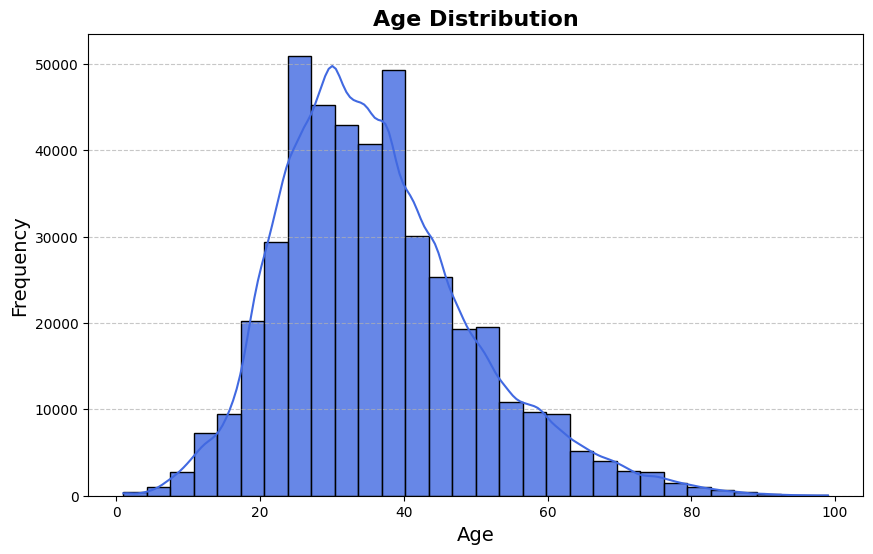

In [64]:
plt.figure(figsize=(10, 6))  # Increase figure size for better readability
sns.histplot(df["age"], bins=30, color="royalblue", edgecolor="black", kde=True, alpha=0.8)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Age Distribution", fontsize=16, fontweight="bold")
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Dashed gridlines for readability

plt.show()


In [65]:
image_counts = df["name"].value_counts()
repeat_individuals = image_counts[image_counts > 1].index
repeat_df = df[df["name"].isin(repeat_individuals)]
age_diffs = repeat_df.groupby("name")["age"].agg(["min", "max"])
age_diffs["age_diff"] = age_diffs["max"] - age_diffs["min"]

print("Total repeat individuals:", len(repeat_individuals))
print("Average age difference among repeat faces:", age_diffs["age_diff"].mean())


Total repeat individuals: 15957
Average age difference among repeat faces: 9.766309456664787


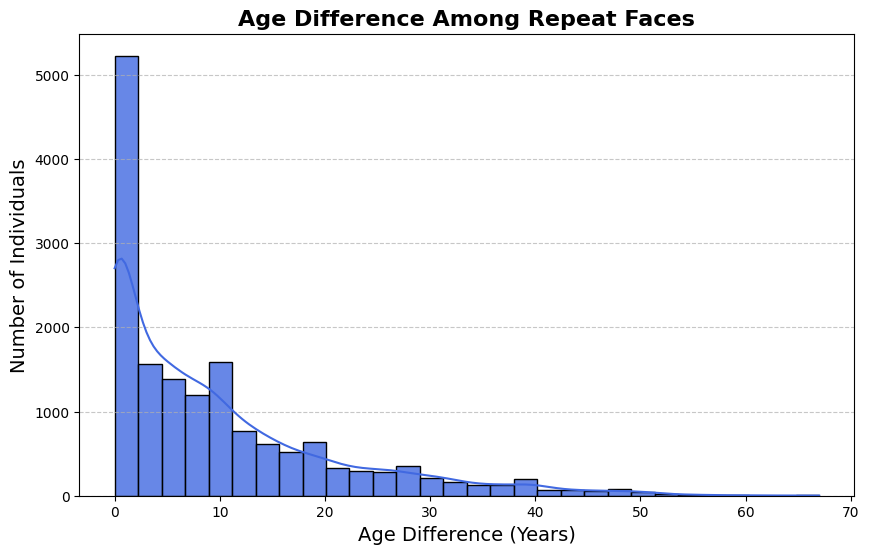

In [66]:
plt.figure(figsize=(10, 6))
sns.histplot(age_diffs["age_diff"].dropna(), bins=30, color="royalblue", edgecolor="black", kde=True, alpha=0.8)
plt.xlabel("Age Difference (Years)", fontsize= 14)
plt.ylabel("Number of Individuals", fontsize=14)
plt.title("Age Difference Among Repeat Faces", fontsize=16, fontweight="bold")
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Dashed gridlines for readability

plt.show()


In [67]:
df.head()

,name,age,photo_taken,face_score,second_face_score,gender,full_path,source
0,Sami Jauhojärvi,27,2009,4.300962,NaN,1.0,17/10000217_1981-05-05_2009.jpg,wiki
1,Dettmar Cramer,38,1964,2.645639,1.949248,1.0,48/10000548_1925-04-04_1964.jpg,wiki
2,Marc Okrand,59,2008,4.329329,NaN,1.0,12/100012_1948-07-03_2008.jpg,wiki
3,Diana Damrau,40,2012,3.408442,NaN,0.0,16/10002116_1971-05-31_2012.jpg,wiki
4,Krista Tippett,51,2012,4.748056,NaN,0.0,02/10002702_1960-11-09_2012.jpg,wiki


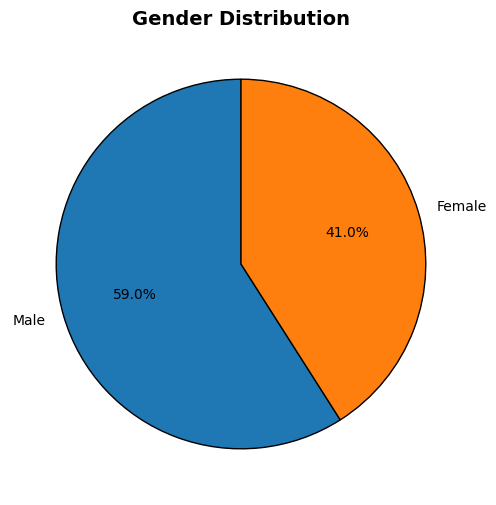

In [68]:
plt.figure(figsize=(10, 6))
plt.pie(df['gender'].value_counts(), labels= ['Male', 'Female'], startangle=90, wedgeprops={"edgecolor": "black"},  autopct='%1.1f%%')
plt.title("Gender Distribution", fontsize=14, fontweight="bold")

plt.show()


In [69]:
df_nonnull = df.copy()
df_nonnull = df_nonnull.dropna()

In [70]:
df_nonnull.info()

<class 'pandas.core.frame.DataFrame'>
Index: 213197 entries, 1 to 442116
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   name               213197 non-null  object 
 1   age                213197 non-null  int64  
 2   photo_taken        213197 non-null  uint16 
 3   face_score         213197 non-null  float64
 4   second_face_score  213197 non-null  float64
 5   gender             213197 non-null  float64
 6   full_path          213197 non-null  object 
 7   source             213197 non-null  object 
dtypes: float64(3), int64(1), object(3), uint16(1)
memory usage: 13.4+ MB


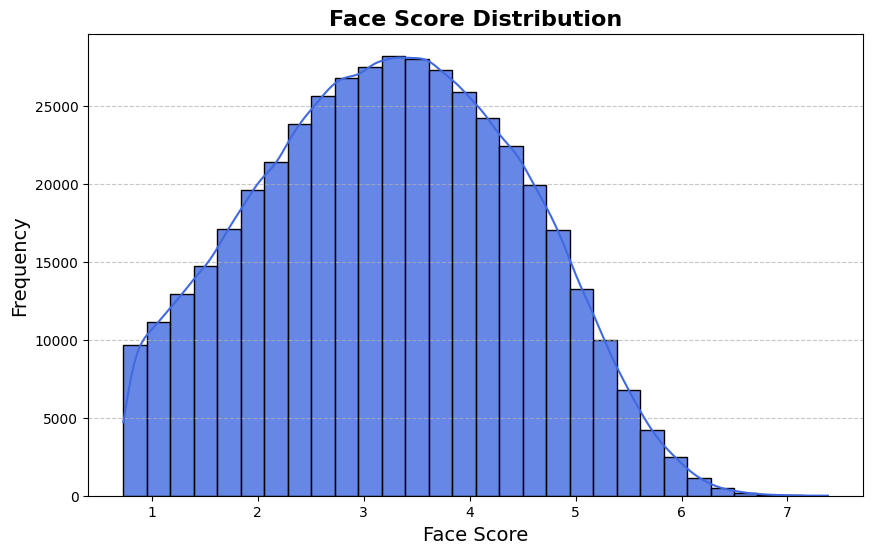

In [71]:
plt.figure(figsize=(10, 6))  # Increase figure size for better readability
sns.histplot(df["face_score"], bins=30, color="royalblue", edgecolor="black", kde=True, alpha=0.8)
plt.xlabel("Face Score", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Face Score Distribution", fontsize=16, fontweight="bold")
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Dashed gridlines for readability

plt.show()

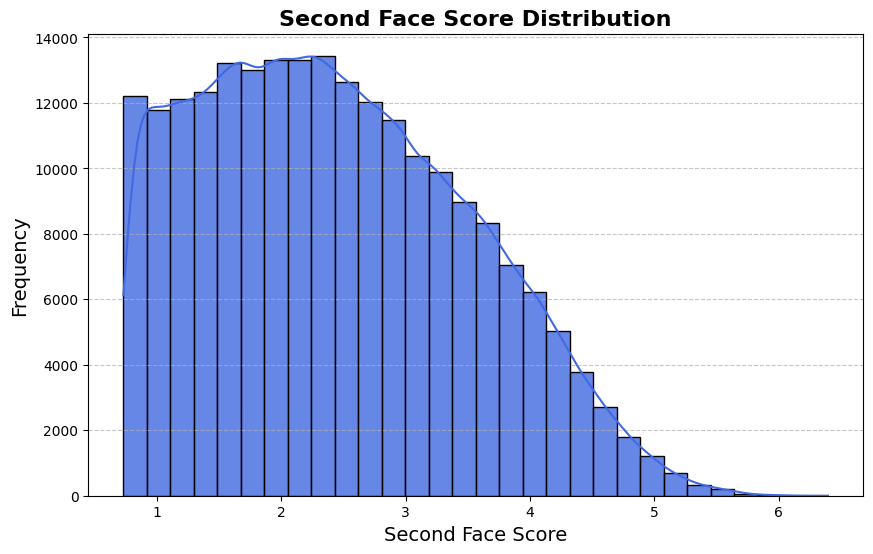

In [72]:
plt.figure(figsize=(10, 6))  # Increase figure size for better readability
sns.histplot(df["second_face_score"], bins=30, color="royalblue", edgecolor="black", kde=True, alpha=0.8)
plt.xlabel("Second Face Score", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Second Face Score Distribution", fontsize=16, fontweight="bold")
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Dashed gridlines for readability

plt.show()